- unit variance: feature testing one bye one, ftest

In [1]:
import pandas as pd

def make_irisdf():
    from sklearn.datasets import load_iris
    from pandas import DataFrame

    iris = load_iris()
    df = DataFrame(iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    return df

iris = make_irisdf()

In [2]:
from sklearn import feature_selection

In [4]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


###VarianceThreshold

In [10]:
# choose the variance grater than 0.6
# variance: ave diff from the mean

print iris.ix[:,:4].apply(lambda x: x.var())
print iris.ix[:,:4].head()
print feature_selection.VarianceThreshold(threshold=.6).fit_transform(iris.ix[:,:4])[:5]

sepal length (cm)    0.685694
sepal width (cm)     0.188004
petal length (cm)    3.113179
petal width (cm)     0.582414
dtype: float64
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[[ 5.1  1.4]
 [ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]]


### SelectKBest

In [16]:
# 3 best features
# f: coefficient, correration, large is better
# p: small is better

print iris.ix[:,:4].head()

ftest = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=3)

print pd.Series(ftest.fit(iris.ix[:,:4], 
                          iris['target']).scores_, 
                index=iris.ix[:,:4].columns)

print ftest.fit_transform(iris.ix[:,:4], iris['target'])[:5]
print 

chi = feature_selection.SelectKBest(score_func=feature_selection.chi2, k=3)
print pd.Series(chi.fit(iris.ix[:,:4], iris['target']).scores_, index=iris.ix[:,:4].columns)
print chi.fit_transform(iris.ix[:,:4], iris['target'])[:5]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
sepal length (cm)     119.264502
sepal width (cm)       47.364461
petal length (cm)    1179.034328
petal width (cm)      959.324406
dtype: float64
[[ 5.1  1.4  0.2]
 [ 4.9  1.4  0.2]
 [ 4.7  1.3  0.2]
 [ 4.6  1.5  0.2]
 [ 5.   1.4  0.2]]

sepal length (cm)     10.817821
sepal width (cm)       3.594499
petal length (cm)    116.169847
petal width (cm)      67.244828
dtype: float64
[[ 5.1  1.4  0.2]
 [ 4.9  1.4  0.2]
 [ 4.7  1.3  0.2]
 [ 4.6  1.5  0.2]
 [ 5.   1.4  0.2]]


###LogisticRegression

In [18]:
from sklearn import linear_model as lm

clf = lm.LogisticRegression(penalty='L1', C=0.1)
print iris.ix[:,:4].head()

print pd.DataFrame(clf.fit(iris.ix[:,:4], iris['target']).coef_, columns=iris.ix[:,:4].columns)
print clf.fit_transform(iris.ix[:,:4], iris['target'])[:5]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.000000          1.124389          -1.344475                 0
1           0.000000         -0.386379           0.122751                 0
2          -0.987898          0.000000           1.277064                 0
[[ 3.5  1.4]
 [ 3.   1.4]
 [ 3.2  1.3]
 [ 3.1  1.5]
 [ 3.6  1.4]]


### DecisionTreeClassifier

In [19]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=4)
print iris.ix[:,:4].head()

#feature_importances_: Gini (info gain)
print pd.Series(clf.fit(iris.ix[:,:4], iris['target']).feature_importances_, index=iris.ix[:,:4].columns)

# transform based on info gain
# return the feature more than 90%
print clf.fit_transform(iris.ix[:,:4], iris['target'])[:5]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
sepal length (cm)    0.013514
sepal width (cm)     0.000000
petal length (cm)    0.051408
petal width (cm)     0.935078
dtype: float64
[[ 0.2]
 [ 0.2]
 [ 0.2]
 [ 0.2]
 [ 0.2]]


### PCA
- linear transformation
- deconposition
- Covariance, square matrix like correlation matrix to compare feature vs feature
- Eigan value deconposition
- eigan value: expalin variance
- eigan vector: 

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
random_data = pd.DataFrame({
        'x': range(1, 10),
        'y': range(1, 10),
        'z': range(1, 10),
    })
print np.cov(random_data.T, bias=1)

print np.var(random_data.x.T)

[[ 6.66666667  6.66666667  6.66666667]
 [ 6.66666667  6.66666667  6.66666667]
 [ 6.66666667  6.66666667  6.66666667]]
6.66666666667


In [25]:
eig, Q = np.linalg.eig(np.cov(random_data.T, bias=1))
# sort for largest eigenvalue
print eig
print Q

[  1.77635684e-15   2.00000000e+01   0.00000000e+00]
[[-0.81649658  0.57735027  0.        ]
 [ 0.40824829  0.57735027 -0.70710678]
 [ 0.40824829  0.57735027  0.70710678]]


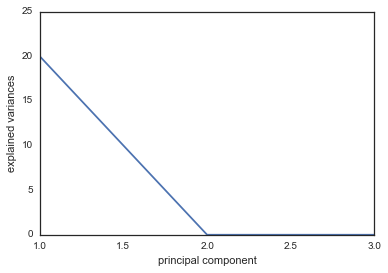

In [26]:
%matplotlib inline
import seaborn as sns
from __future__ import division
import numpy as np

eigsort = np.sort(eig)[::-1]
sns.set_style('white')
plt.figure()
plt.plot(range(1, len(eigsort) + 1), eigsort)
plt.xlabel('principal component')
plt.ylabel('explained variances')
plt.show()

   x         y          z
0  1 -3.906345 -11.535198
1  2 -7.512851  25.457084
2  3 -3.561343 -12.168115
3  4  4.803953  -4.119727
4  5  1.841309   9.031659


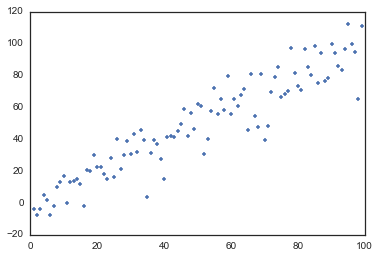

In [27]:
random_data_scattered = pd.DataFrame({
        'x': range(1, 100),
        'y': range(1, 100),
        'z': range(1, 100),
    })

random_data_scattered['y'] = random_data_scattered.y.apply(lambda y: y + np.random.normal(scale=10))
random_data_scattered['z'] = random_data_scattered.z.apply(lambda z: z + np.random.normal(scale=20))

print random_data_scattered.head()

plt.plot(random_data_scattered.x, random_data_scattered.y, '.')

In [28]:
eig, Q = np.linalg.eig(np.cov(random_data_scattered.T, bias=1))
# sort for largest eigenvalue
print eig
print Q

[ 2557.02921091    50.18729765   197.48439168]
[[ 0.54993393  0.80058715 -0.23797665]
 [ 0.58277039 -0.57191959 -0.57730984]
 [ 0.59829035 -0.17879652  0.78107648]]


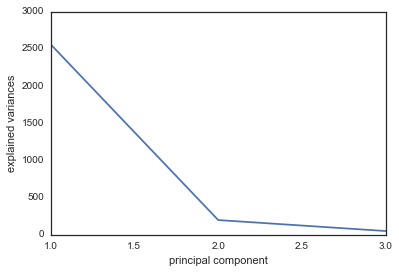

In [35]:
import seaborn as sns
from __future__ import division

eigsort = np.sort(eig)[::-1]

sns.set_style('white')
plt.figure()
plt.plot(range(1, len(eigsort) + 1), eigsort)
plt.xlabel('principal component')
plt.ylabel('explained variances')
plt.show()

In [ ]:
plt.plot()

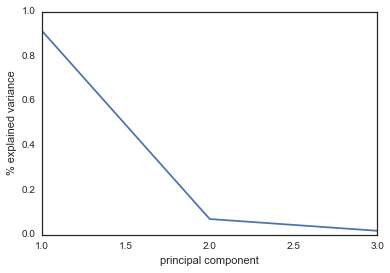

In [41]:
plt.figure()
plt.plot(range(1, len(eigsort) + 1), eigsort / sum(eigsort))
plt.xlabel('principal component')
plt.ylabel('% explained variance')
plt.show()

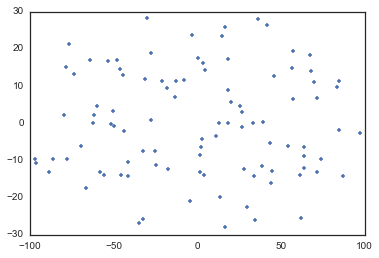

In [38]:
from sklearn import decomposition

# first component explains more variance
x_trans = decomposition.PCA().fit_transform(random_data_scattered).T
plt.plot(x_trans[0], x_trans[1], '.')

In [ ]:
PCA().fit()
PCA().transform()
